In [9]:
import numpy as np 
import scipy.io
import scipy.stats as st
import scipy.integrate
import networkx as kx
from libpysal import weights
import matplotlib.pyplot as plt
import shapely.geometry as sh
import warnings
warnings.filterwarnings("ignore")
import Entropy_Metrics as es
import glob
import json

In [10]:
# how to load matrices from csv
# file = np.loadtxt(open(r"path", "r"), delimiter=",")

In [11]:
# globing the graphs (no voronoi)
graph_families = glob.glob("/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10???")

# sectioning them off by node number 
graph_families_100 = graph_families[:20]
graph_families_200 = graph_families[20:40]
graph_families_300 = graph_families[40:-1]

In [12]:
# collecting the global paths of all graphs of a certian node number and then concatonating all coordinates file
# and adjacency matrix file paths 
# the structure of the list starts out with one family of graphs, 101 of its lloyds itterations, and begins with 
# the next graph family

graph_coordinates_100 = []
adjacency_matrices_100 = []
for i in graph_families_100:
    graph_coordinates_100 += glob.glob(i +"/*_xy.csv")
    adjacency_matrices_100 += glob.glob(i +"/*_Adj.csv")

graph_coordinates_200 = []
adjacency_matrices_200 = []
for i in graph_families_200:
    graph_coordinates_200 += glob.glob(i +"/*_xy.csv")
    adjacency_matrices_200 += glob.glob(i +"/*_Adj.csv")

graph_coordinates_300 = []
adjacency_matrices_300 = []
for i in graph_families_300:
    graph_coordinates_300 += glob.glob(i +"/*_xy.csv")
    adjacency_matrices_300 += glob.glob(i +"/*_Adj.csv")

In [13]:
# these calculate the entropy and resistances of each graph

length = len(adjacency_matrices_100)
resistances_100 = np.zeros(length)
edge_entropies_100 = np.zeros(length)
degree_entropies_100 = np.zeros(length)

for i,adjacency_matrix_100 in enumerate(adjacency_matrices_100):  
    coords = np.loadtxt(open(graph_coordinates_100[i], "r"), delimiter=",")
    adj = np.loadtxt(open(adjacency_matrix_100, "r"), delimiter=",")
    weighted_adj = es.weight_adj(coords, adj)
    resistances_100[i] = es.resistance(coords, adj)
    edge_entropies_100[i] = es.edge_entropy(weighted_adj)
    degree_entropies_100[i] = es.degree_entropy(adj)

length = len(adjacency_matrices_200)
resistances_200 = np.zeros(length)
edge_entropies_200 = np.zeros(length)
degree_entropies_200 = np.zeros(length)
for i,adjacency_matrix_200 in enumerate(adjacency_matrices_200):  
    coords = np.loadtxt(open(graph_coordinates_200[i], "r"), delimiter=",")
    adj = np.loadtxt(open(adjacency_matrix_200, "r"), delimiter=",")
    weighted_adj = es.weight_adj(coords, adj)
    resistances_200[i] = es.resistance(coords, adj)
    edge_entropies_200[i] = es.edge_entropy(weighted_adj)
    degree_entropies_200[i] = es.degree_entropy(adj)
    
length = len(adjacency_matrices_300)
resistances_300 = np.zeros(length)
edge_entropies_300 = np.zeros(length)
degree_entropies_300 = np.zeros(length)
for i,adjacency_matrix_300 in enumerate(adjacency_matrices_300):  
    coords = np.loadtxt(open(graph_coordinates_300[i], "r"), delimiter=",")
    adj = np.loadtxt(open(adjacency_matrix_300, "r"), delimiter=",")
    weighted_adj = es.weight_adj(coords, adj)
    resistances_300[i] = es.resistance(coords, adj)
    edge_entropies_300[i] = es.edge_entropy(weighted_adj)
    degree_entropies_300[i] = es.degree_entropy(adj)

In [14]:
# this reshapes each array into a 2d numpy array where each column is a llyods itteration and 
# each row by a family of graphs 
length_300 = len(adjacency_matrices_300)//101
length_200 = len(adjacency_matrices_200)//101
length_100 = len(adjacency_matrices_100)//101
resistances_300 = np.reshape(resistances_300, (length_300, 101))
resistances_200 = np.reshape(resistances_200, (length_200, 101))
resistances_100 = np.reshape(resistances_100, (length_100, 101))
edge_entropies_300 = np.reshape(edge_entropies_300, (length_300, 101))
edge_entropies_200 = np.reshape(edge_entropies_200, (length_200, 101))
edge_entropies_100 = np.reshape(edge_entropies_100, (length_100, 101))
degree_entropies_300 = np.reshape(degree_entropies_300, (length_300, 101))
degree_entropies_200 = np.reshape(degree_entropies_200, (length_200, 101))
degree_entropies_100 = np.reshape(degree_entropies_100, (length_100, 101))

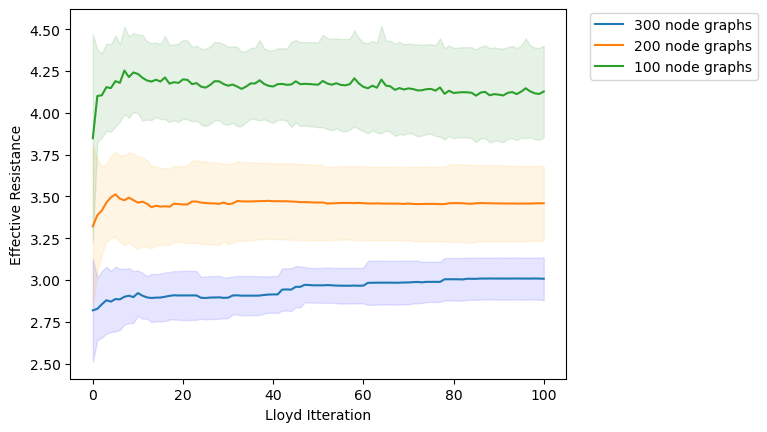

In [15]:
# computs std and mean of resistance per itteration

resistances_300_std = np.std(resistances_300, axis = 0)
resistances_200_std = np.std(resistances_200, axis = 0)
resistances_100_std = np.std(resistances_100, axis = 0)

resistances_300_mean = np.mean(resistances_300, axis = 0)
resistances_200_mean = np.mean(resistances_200, axis = 0)
resistances_100_mean = np.mean(resistances_100, axis = 0)

plt.plot(resistances_300_mean,label="300 node graphs")
plt.fill_between(range(len(resistances_300_mean)), (resistances_300_mean - resistances_300_std), (resistances_300_mean + resistances_300_std), color = 'b', alpha = .1)
plt.plot(resistances_200_mean,label="200 node graphs")
plt.fill_between(range(len(resistances_200_mean)), (resistances_200_mean - resistances_200_std), (resistances_200_mean + resistances_200_std), color = 'orange', alpha = .1)
plt.plot(resistances_100_mean,label="100 node graphs")
plt.fill_between(range(len(resistances_100_mean)), (resistances_100_mean - resistances_100_std), (resistances_100_mean + resistances_100_std), color = 'g', alpha = .1)
plt.xlabel("Lloyd Itteration")
plt.ylabel("Effective Resistance")
plt.legend(bbox_to_anchor = (1.40, .9), loc='center right')
plt.show()

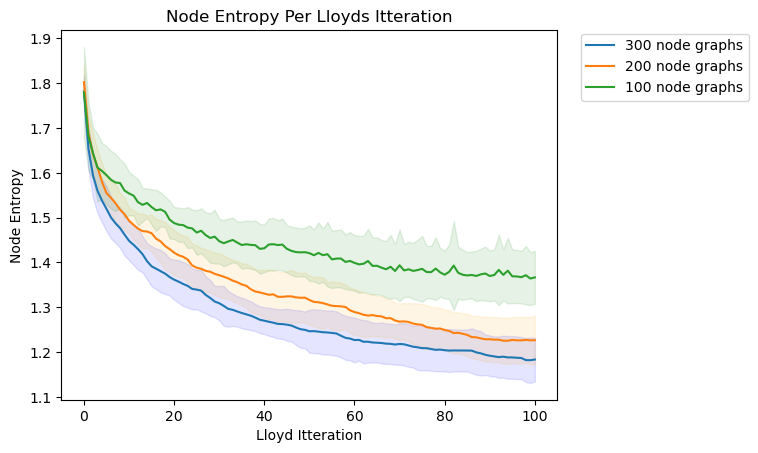

In [16]:
# computes the average degree entropy per lloyds itteration

degree_entropies_300_std = np.std(degree_entropies_300, axis = 0)
degree_entropies_200_std = np.std(degree_entropies_200, axis = 0)
degree_entropies_100_std = np.std(degree_entropies_100, axis = 0)

degree_entropies_300_mean = np.mean(degree_entropies_300, axis = 0)
degree_entropies_200_mean = np.mean(degree_entropies_200, axis = 0)
degree_entropies_100_mean = np.mean(degree_entropies_100, axis = 0)

plt.plot(degree_entropies_300_mean,label="300 node graphs")
plt.fill_between(range(len(degree_entropies_300_mean)), (degree_entropies_300_mean - degree_entropies_300_std), (degree_entropies_300_mean + degree_entropies_300_std), color = 'b', alpha = .1)
plt.plot(degree_entropies_200_mean,label="200 node graphs")
plt.fill_between(range(len(degree_entropies_200_mean)), (degree_entropies_200_mean - degree_entropies_200_std), (degree_entropies_200_mean + degree_entropies_200_std), color = 'orange', alpha = .1)
plt.plot(degree_entropies_100_mean,label="100 node graphs")
plt.fill_between(range(len(degree_entropies_100_mean)), (degree_entropies_100_mean - degree_entropies_100_std), (degree_entropies_100_mean + degree_entropies_100_std), color = 'g', alpha = .1)
plt.xlabel("Lloyd Itteration")
plt.ylabel("Node Entropy")
plt.title("Node Entropy Per Lloyds Itteration")
plt.legend(bbox_to_anchor = (1.40, .9), loc='center right')
plt.show()

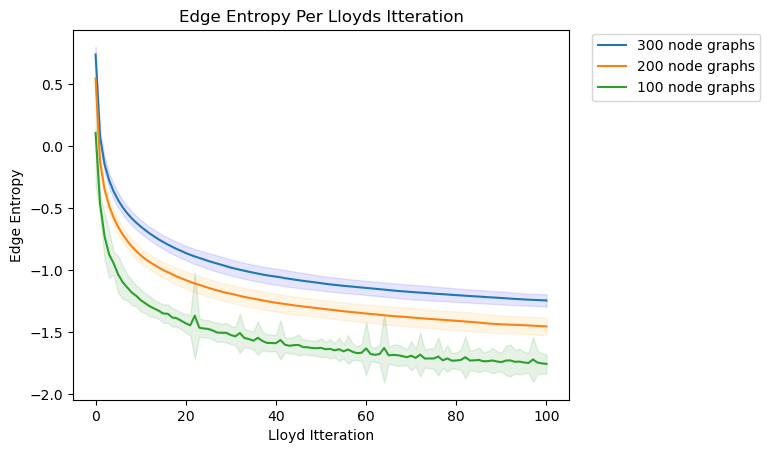

In [17]:
# computes the average edge entropy per lloyds itteration 

edge_entropies_300_std = np.std(edge_entropies_300, axis = 0)
edge_entropies_200_std = np.std(edge_entropies_200, axis = 0)
edge_entropies_100_std = np.std(edge_entropies_100, axis = 0)

edge_entropies_300_mean = np.mean(edge_entropies_300, axis = 0)
edge_entropies_200_mean = np.mean(edge_entropies_200, axis = 0)
edge_entropies_100_mean = np.mean(edge_entropies_100, axis = 0)



plt.plot(edge_entropies_300_mean,label="300 node graphs")
plt.fill_between(range(len(edge_entropies_300_mean)), (edge_entropies_300_mean - edge_entropies_300_std), (edge_entropies_300_mean + edge_entropies_300_std), color = 'b', alpha = .1)
plt.plot(edge_entropies_200_mean,label="200 node graphs")
plt.fill_between(range(len(edge_entropies_200_mean)), (edge_entropies_200_mean - edge_entropies_200_std), (edge_entropies_200_mean + edge_entropies_200_std), color = 'orange', alpha = .1)
plt.plot(edge_entropies_100_mean,label="100 node graphs")
plt.fill_between(range(len(edge_entropies_100_mean)), (edge_entropies_100_mean - edge_entropies_100_std), (edge_entropies_100_mean + edge_entropies_100_std), color = 'g', alpha = .1)
plt.xlabel("Lloyd Itteration")
plt.ylabel("Edge Entropy")
plt.title("Edge Entropy Per Lloyds Itteration")
plt.legend(bbox_to_anchor = (1.40, .9), loc='center right')
plt.show()

In [19]:
adj300 = adjacency_matrices_300[:101]
graph300 = graph_coordinates_300[:101]

['/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds0_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds1_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds2_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds3_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds4_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds5_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds6_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds7_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds8_xy.csv', '/oit-rs/networks/ARCHIVE/ConfigLib/DATA/PC10041/PC10041 _300_2D_RandU_Delauney-box_Lloyds

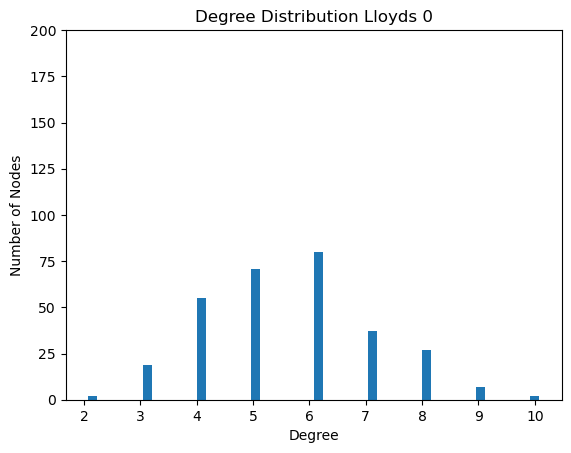

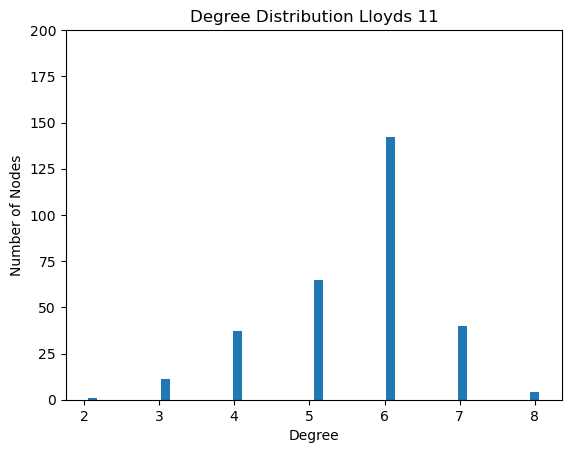

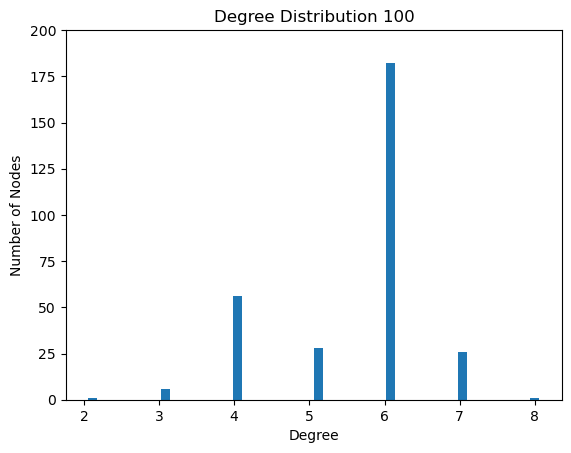

In [29]:
i = 0
coords = np.loadtxt(open(graph300[i], "r"), delimiter=",")
adj = np.loadtxt(open(adj300[i], "r"), delimiter=",")
degrees_0 = adj.sum(axis=0)
x = plt.hist(degrees_0, align= 'right', bins = 50)
plt.ylim(0,200)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution Lloyds " + str(i))
plt.show()

i = 11
coords = np.loadtxt(open(graph300[i], "r"), delimiter=",")
adj = np.loadtxt(open(adj300[i], "r"), delimiter=",")
degrees_10 = adj.sum(axis=0)
x = plt.hist(degrees_10, align= 'right', bins = 50)
plt.ylim(0,200)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution Lloyds " + str(i))
plt.show()

i = 100
coords = np.loadtxt(open(graph300[i], "r"), delimiter=",")
adj = np.loadtxt(open(adj300[i], "r"), delimiter=",")
degrees_100 = adj.sum(axis=0)
x = plt.hist(degrees_100, align= 'right', bins = 50)
plt.ylim(0,200)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution " + str(i))
plt.show()



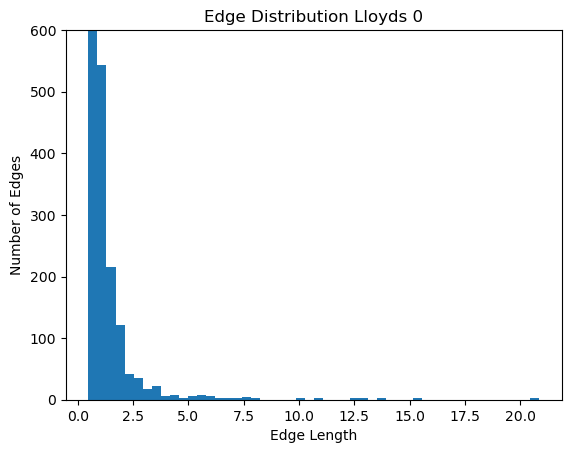

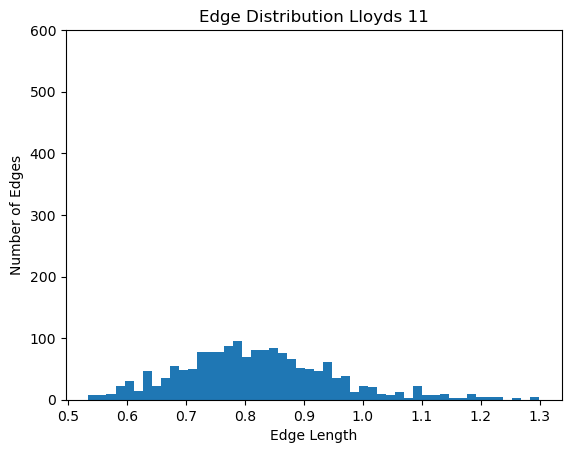

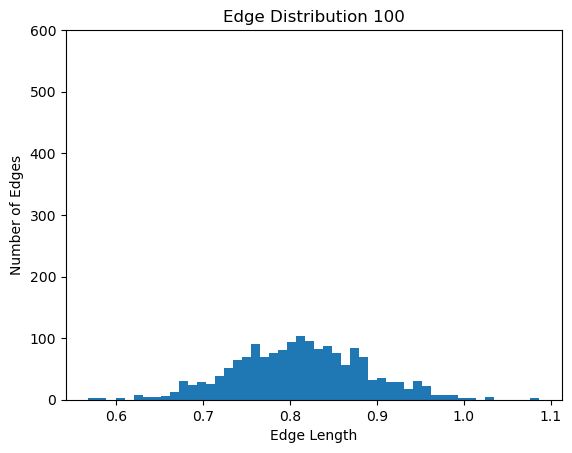

In [30]:
i = 0
coords = np.loadtxt(open(graph300[i], "r"), delimiter=",")
adj = np.loadtxt(open(adj300[i], "r"), delimiter=",")
weighted = es.weight_adj(coords, adj).flatten()
weighted_0 = weighted[weighted != 0]
x = plt.hist(weighted_0, align= 'right', bins = 50)

plt.xlabel("Edge Length")
plt.ylabel("Number of Edges")
plt.title("Edge Distribution Lloyds " + str(i))
plt.ylim(0,600)
plt.show()

i = 11
coords = np.loadtxt(open(graph300[i], "r"), delimiter=",")
adj = np.loadtxt(open(adj300[i], "r"), delimiter=",")
weighted = es.weight_adj(coords, adj).flatten()
weighted_10 = weighted[weighted != 0]
x = plt.hist(weighted_10, align= 'right', bins = 50)

plt.xlabel("Edge Length")
plt.ylabel("Number of Edges")
plt.title("Edge Distribution Lloyds " + str(i))
plt.ylim(0,600)
plt.show()

i = 100
coords = np.loadtxt(open(graph300[i], "r"), delimiter=",")
adj = np.loadtxt(open(adj300[i], "r"), delimiter=",")
weighted = es.weight_adj(coords, adj).flatten()
weighted_100 = weighted[weighted != 0]
x = plt.hist(weighted_100, align= 'right', bins = 50)
plt.xlabel("Edge Length")
plt.ylabel("Number of Edges")
plt.title("Edge Distribution " + str(i))
plt.ylim(0,600)
plt.show()

In [35]:
import json
dict1 = {
    "300 nodes" : {
        "resistances" : {
            "std" : resistances_300_std.tolist(),
            "mean" : resistances_300_mean.tolist()
        },
        "edge entropy" : {
            "std" : edge_entropies_300_std.tolist(),
            "mean" :edge_entropies_300_mean.tolist()
        },
        "degree entropy" : {
            "std" : degree_entropies_300_std.tolist(),
            "mean" : degree_entropies_300_mean.tolist()
        },
    },
    "200 nodes" : {
        "resistances" : {
            "std" : resistances_200_std.tolist(),
            "mean" : resistances_200_mean.tolist()
        },
        "edge entropy" : {
            "std" : edge_entropies_200_std.tolist(),
            "mean" :edge_entropies_200_mean.tolist()
        },
        "degree entropy" : {
            "std" : degree_entropies_200_std.tolist(),
            "mean" : degree_entropies_200_mean.tolist()
        },
    },
    "100 nodes" : {
        "resistances" : {
            "std" : resistances_100_std.tolist(),
            "mean" : resistances_100_mean.tolist()
        },
        "edge entropy" : {
            "std" : edge_entropies_100_std.tolist(),
            "mean" :edge_entropies_100_mean.tolist()
        },
        "degree entropy" : {
            "std" : degree_entropies_100_std.tolist(),
            "mean" :degree_entropies_100_mean.tolist()
        },
    },
 }
dict2 = {
    "network" : "PC10041",
    "Lloyds 0" : degrees_0.tolist(),
    "Lloyds 10" : degrees_10.tolist(),
    "Lloyds 101" : degrees_100.tolist()
}
dict3 = {
    "network" : "PC10041",
    "Lloyds 0" : weighted_0.tolist(),
    "Lloyds 10" : weighted_10.tolist(),
    "Lloyds 101" : weighted_100.tolist()
}
with open("resistance_entropy_lloyds_trends", "w") as fp:
    json.dump(dict1 , fp) 
with open("degree_entropy_examples", "w") as fp:
    json.dump(dict2 , fp) 
with open("edge_entropy_examples", "w") as fp:
    json.dump(dict3 , fp) 